**Importing the necessary libraries**

In [254]:
import pandas as pd               # For data manipulation and analysis            # For numerical operations
import seaborn as sns            # For data visualization
import matplotlib.pyplot as plt   # For plotting graphs
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import AdaBoostClassifier    # For ensemble learning using AdaBoost
from sklearn.tree import DecisionTreeClassifier     # For decision tree classification
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning with grid search
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For evaluating model performance
from sklearn.metrics import classification_report  # For detailed classification report
from sklearn.metrics import roc_curve, auc       # For calculating and plotting ROC curve
from imblearn.over_sampling import SMOTE         # For handling class imbalance with SMOTE

**Load the dataset**

In [257]:
import pandas as pd

# Define the column names
columns = ['ID', 'Diagnosis'] + [ 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1',  'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',  'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
# Load the dataset with the updated column names
file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
data = pd.read_csv(file_path, header=None, names=columns)

**Displaying the first 5 rows of the dataset to get an overview of the data structure**

In [259]:
print(data.head())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

**Displaying the First 10 Rows of the Dataset**

In [261]:
print(data.head(10))

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   
5    843786         M    12.45     15.70       82.57   477.1      0.12780   
6    844359         M    18.25     19.98      119.60  1040.0      0.09463   
7  84458202         M    13.71     20.83       90.20   577.9      0.11890   
8    844981         M    13.00     21.82       87.50   519.8      0.12730   
9  84501001         M    12.46     24.04       83.97   475.9      0.11860   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760     0.30010          0.14710  ...    25.38     17.33   
1       

**Displaying the Last 10 Rows of the Dataset**

In [263]:
print(data.tail(10))

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
559  925291         B    11.51     23.93       74.52   403.5      0.09261   
560  925292         B    14.05     27.15       91.38   600.4      0.09929   
561  925311         B    11.20     29.37       70.67   386.0      0.07449   
562  925622         M    15.22     30.62      103.40   716.9      0.10480   
563  926125         M    20.92     25.09      143.00  1347.0      0.10990   
564  926424         M    21.56     22.39      142.00  1479.0      0.11100   
565  926682         M    20.13     28.25      131.20  1261.0      0.09780   
566  926954         M    16.60     28.08      108.30   858.1      0.08455   
567  927241         M    20.60     29.33      140.10  1265.0      0.11780   
568   92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  ...  radius3  texture3  \
559       0.10210     0.11120          0.04105  ...   12.480     37.16   
560 

**Displaying the shape of the dataset.It returns the number of rows and columns in the DataFrame.**

In [267]:
data.shape

(569, 32)

**Displaying summary information about the dataset**

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

**To Display statistical summary of numerical columns in the dataset**

In [275]:
data.describe()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



**To Display transposed statistical summary of numerical columns in the dataset**

In [278]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**To Check for duplicate rows**

In [281]:
num_total_rows = len(data) # Calculate total number of rows
num_duplicate_rows = data.duplicated().sum() # Calculate number of duplicate rows
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100 # Calculate percentage of duplicate rows
print(f"Number of Rows with Duplicates: {num_duplicate_rows}") # Print the results
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


**Counting Unique Values for Each Column**

In [284]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID                    569
Diagnosis               2
radius1               456
texture1              479
perimeter1            522
area1                 539
smoothness1           474
compactness1          537
concavity1            537
concave_points1       542
symmetry1             432
fractal_dimension1    499
radius2               540
texture2              519
perimeter2            533
area2                 528
smoothness2           547
compactness2          541
concavity2            533
concave_points2       507
symmetry2             498
fractal_dimension2    545
radius3               457
texture3              511
perimeter3            514
area3                 544
smoothness3           411
compactness3          529
concavity3            539
concave_points3       492
symmetry3             500
fractal_dimension3    535
dtype: int64


**Dropping unecessary columns (ID)**

In [287]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)
print(data.columns) #verifying remaining columns

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


**Encoding Target variables**

In [290]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})  # Map 'M' to 1, 'B' to 0
print(data.head())                      # Check the first few rows after encoding


   Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0          1    17.99     10.38      122.80  1001.0      0.11840   
1          1    20.57     17.77      132.90  1326.0      0.08474   
2          1    19.69     21.25      130.00  1203.0      0.10960   
3          1    11.42     20.38       77.58   386.1      0.14250   
4          1    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  symmetry1  ...  radius3  \
0       0.27760      0.3001          0.14710     0.2419  ...    25.38   
1       0.07864      0.0869          0.07017     0.1812  ...    24.99   
2       0.15990      0.1974          0.12790     0.2069  ...    23.57   
3       0.28390      0.2414          0.10520     0.2597  ...    14.91   
4       0.13280      0.1980          0.10430     0.1809  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1   

In [292]:
print(data['Diagnosis'].value_counts())


Diagnosis
0    357
1    212
Name: count, dtype: int64


C:\Users\91979\AppData\Local\Temp\ipykernel_19804\1755581855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


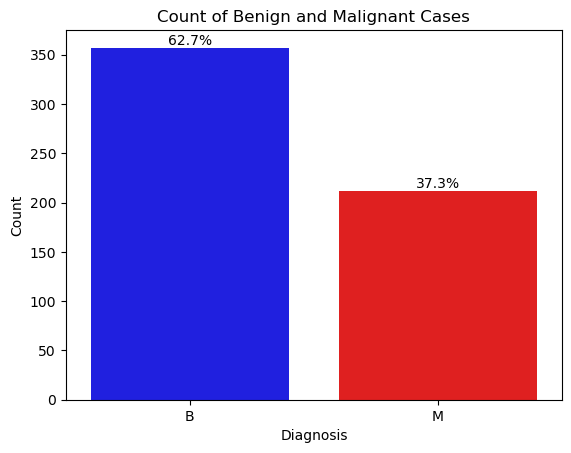

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Diagnosis is mapped to labels for plotting
data['Diagnosis_Label'] = data['Diagnosis'].map({1: 'M', 0: 'B'})
# Generate the countplot
ax = sns.countplot(
    x='Diagnosis_Label',
    data=data,
    palette={'B': 'blue', 'M': 'red'},  # Map colors to labels
    order=['B', 'M']  # Ensure correct order of labels
)
# Add title and labels
plt.title('Count of Benign and Malignant Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
# Add percentages on top of the bars
total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count / total * 100:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2,
        count + 3,
        percentage,
        ha='center'
    )
# Display the plot
plt.show()
# Drop temporary column to clean data
data.drop(columns=['Diagnosis_Label'], inplace=True)

**Check for missing values**

In [297]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64
No missing values found in the dataset.


**Correlation Heatmap of Features in the Dataset**

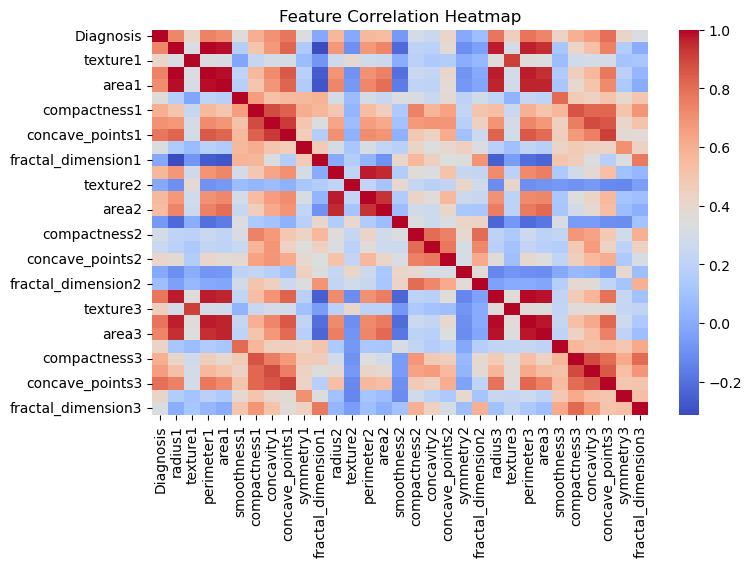

In [300]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Pairwise Feature Visualization Using Seaborn's Pairplot**

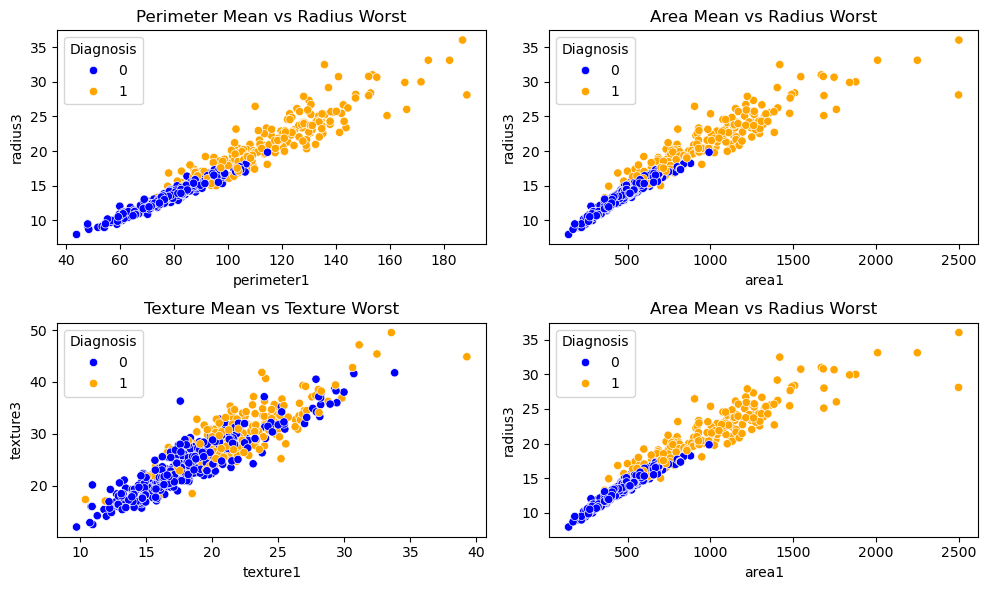

In [383]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['perimeter1'], y=data['radius3'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Perimeter Mean vs Radius Worst')

plt.subplot(2, 2, 2)
sns.scatterplot(x=data['area1'], y=data['radius3'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Area Mean vs Radius Worst')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['texture1'], y=data['texture3'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Texture Mean vs Texture Worst')

plt.subplot(2, 2, 4)
sns.scatterplot(x=data['area1'], y=data['radius3'], hue=data['Diagnosis'], palette=['blue', 'orange'])
plt.title('Area Mean vs Radius Worst')

plt.tight_layout()
plt.show()

**Outlier Detection**

In [ ]:
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())

**Visualization of Outlier Distribution Across Features**

C:\Users\91979\AppData\Local\Temp\ipykernel_19804\92784684.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values, palette='viridis')  # Set color palette


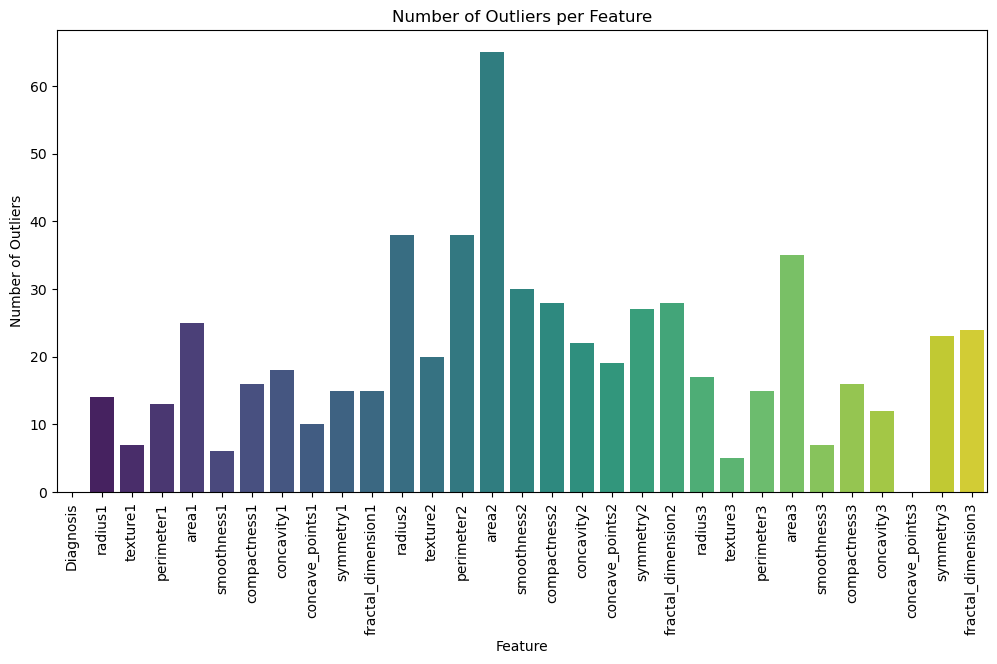

In [309]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()
# Visualize the number of outliers per feature
# Visualize the number of outliers per feature with a color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values, palette='viridis')  # Set color palette
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.xlabel("Feature")
plt.ylabel("Number of Outliers")
plt.show()


**Splitting the Data into Features and Target Variable**

In [313]:
# Split data into features and labels
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

**Spliting data into training and testing sets**

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Applying SMOTE on training data**

In [319]:
# Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Initialize AdaBoost Classifier**

In [322]:
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump as weak learner
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Default learning rate
    algorithm="SAMME",  # Set to SAMME to avoid the FutureWarning
    random_state=42
)


**Training the AdaBoost Model without Hyperparameter Tuning**

In [325]:
# Train the AdaBoost model using the resampled (balanced) training dataset
ada_classifier.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = ada_classifier.predict(X_test)

**Calculating Performance Metrics**

In [328]:
# Calculate precision
precision_smote = precision_score(y_test, y_pred)
# Calculate recall
recall_smote = recall_score(y_test, y_pred)
# Calculate F1 score
f1_smote = f1_score(y_test, y_pred)
# Calculate accuracy
accuracy_smote = accuracy_score(y_test, y_pred)


**Displaying Evaluation Results**


Performance Metrics (Before Hyperparameter Tuning):

Accuracy: 0.9649

Precision: 0.9254

Recall: 0.9841

F1 Score: 0.9538

Confusion Matrix:
[[103   5]
 [  1  62]]


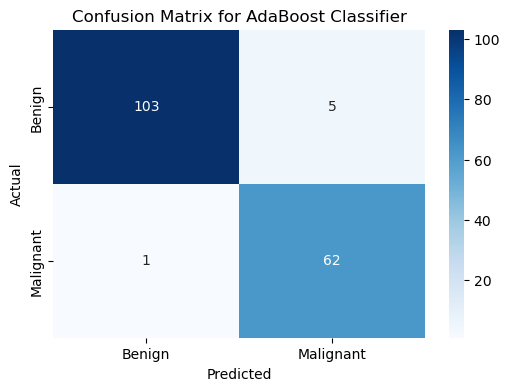

In [331]:
# Display the evaluation results
print("\nPerformance Metrics (Before Hyperparameter Tuning):")
print(f"\nAccuracy: {accuracy_smote:.4f}")
print(f"\nPrecision: {precision_smote:.4f}")
print(f"\nRecall: {recall_smote:.4f}")
print(f"\nF1 Score: {f1_smote:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_smote)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

**Hyperparameter Tunning**

In [334]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'estimator__max_depth': [1, 2, 3]
}

**Performing Hyperparameter Tuning using Grid Search with Cross-Validation**

In [337]:
# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

**Best Hyperparameters and Model Selection**

In [339]:
# Best Parameters and Model
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters from Grid Search:
{'estimator__max_depth': 2, 'learning_rate': 1.0, 'n_estimators': 150}


**Making Predictions with the Best Model**

In [341]:
y_pred_best = best_model.predict(X_test)

**Evaluating Performence Metrics**

In [343]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

**Displaying and Visualizing Evaluation Metrics for the Best Model**


Performance Metrics (After Hyperparameter Tuning):

Accuracy: 0.9649

Precision: 0.9524

Recall: 0.9524

F1 Score: 0.9524

Confusion Matrix:
[[105   3]
 [  3  60]]


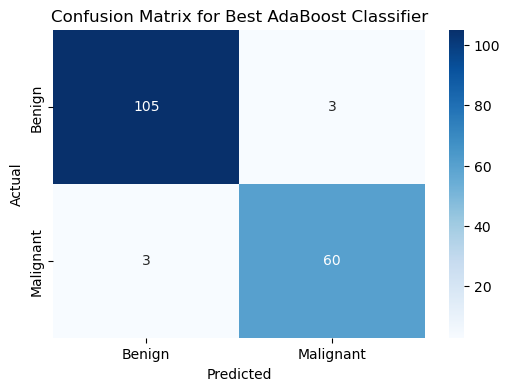

In [345]:
# Displaying the Evaluation Results for the Best Model
print("\nPerformance Metrics (After Hyperparameter Tuning):")
print(f"\nAccuracy: {accuracy_best:.4f}")
print(f"\nPrecision: {precision_best:.4f}")
print(f"\nRecall: {recall_best:.4f}")
print(f"\nF1 Score: {f1_best:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Best AdaBoost Classifier')
plt.show()

**Classification Report**

In [347]:
print("\nClassification Report for Best Model:(After Hyperparameter tuning)")
print(classification_report(y_test, y_pred_best, target_names=["Benign", "Malignant"]))


Classification Report for Best Model:(After Hyperparameter tuning)
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97       108
   Malignant       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



**Feature Importance for Fine-Tuned AdaBoost Model**

C:\Users\91979\AppData\Local\Temp\ipykernel_19804\3613402407.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_d')


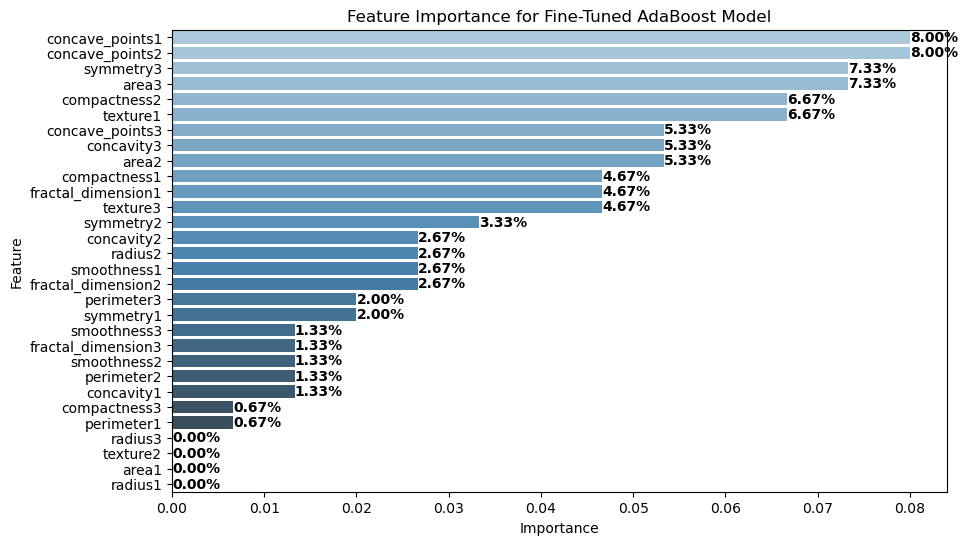

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'best_ada_classifier' is the trained AdaBoost model and 'X' is your feature matrix
importances = best_ada_classifier.feature_importances_

# Create a DataFrame with feature names and importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_d')

# Add percentage labels on the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value * 100:.2f}%', va='center', ha='left', color='black', fontweight='bold')

plt.title('Feature Importance for Fine-Tuned AdaBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



**Filtered Feature Importance for Fine-Tuned AdaBoost Model (Non-Zero Importance)**

Remaining features after filtering out those with zero importance: 26
               Feature  Importance
7      concave_points1    0.080000
17     concave_points2    0.080000
28           symmetry3    0.073333
23               area3    0.073333
15        compactness2    0.066667
1             texture1    0.066667
27     concave_points3    0.053333
26          concavity3    0.053333
13               area2    0.053333
5         compactness1    0.046667
9   fractal_dimension1    0.046667
21            texture3    0.046667
18           symmetry2    0.033333
16          concavity2    0.026667
10             radius2    0.026667
4          smoothness1    0.026667
19  fractal_dimension2    0.026667
22          perimeter3    0.020000
8            symmetry1    0.020000
24         smoothness3    0.013333
29  fractal_dimension3    0.013333
14         smoothness2    0.013333
12          perimeter2    0.013333
6           concavity1    0.013333
25        compactness3    0.006667
2           perimete

C:\Users\91979\AppData\Local\Temp\ipykernel_19804\4122952185.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=filtered_feature_importance_df, palette='Blues_d')


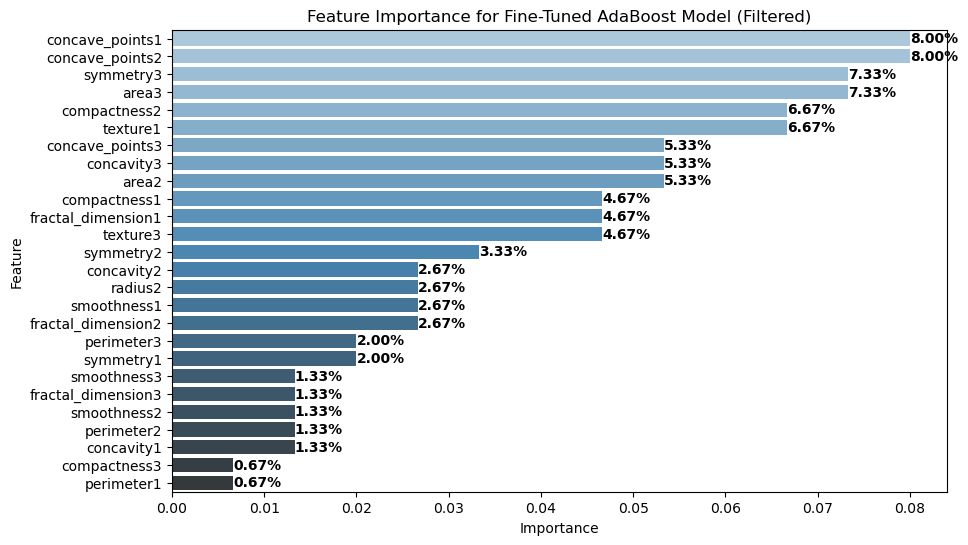

In [381]:
# Filter out features with zero importance
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > 0]

# Display the remaining features and their importance values
print(f"Remaining features after filtering out those with zero importance: {filtered_feature_importance_df.shape[0]}")

# Optionally, you can display the remaining features and their importance values
print(filtered_feature_importance_df)

# Plot the remaining features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_feature_importance_df, palette='Blues_d')

# Add percentage labels on the bars
for index, value in enumerate(filtered_feature_importance_df['Importance']):
    plt.text(value, index, f'{value * 100:.2f}%', va='center', ha='left', color='black', fontweight='bold')

plt.title('Feature Importance for Fine-Tuned AdaBoost Model (Filtered)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**Plotting ROC Curve for Best Model with AUC**

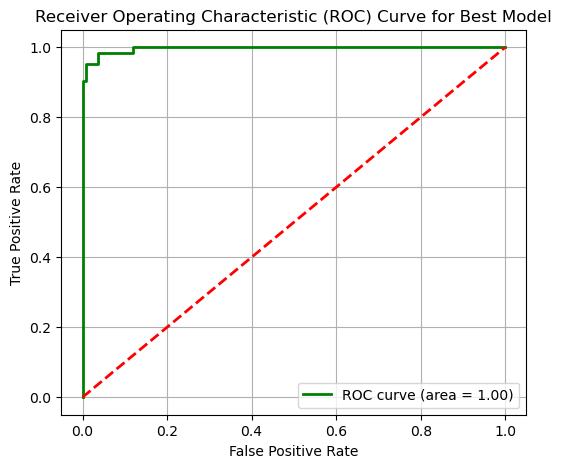

In [375]:
# Get predicted probabilities
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
# Calculate ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_proba_best)
# Calculate the AUC
roc_auc_best = auc(fpr_best, tpr_best)
# Plot the ROC curve with a different color (e.g., green)
plt.figure(figsize=(6, 5))
plt.plot(fpr_best, tpr_best, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [389]:
import joblib

# Assuming X is the DataFrame of features used during training
feature_names = important_features
joblib.dump((best_model, feature_names), "breast_cancer_features.pkl")
print("Model and feature names saved successfully!")


Model and feature names saved successfully!
